In [1]:
%load_ext sql

In [2]:
%sql postgresql://appdev@data:5432/appdev

'Connected: appdev@appdev'

In [25]:
%%sql 
DROP VIEW maxpup;
CREATE VIEW maxpup as
SELECT * FROM geonames WHERE population IN (SELECT MAX(population) FROM geonames)

Done.
Done.


[]

In [27]:
%sql SELECT * FROM maxpup

1 rows affected.


geonameid,name,longitude,latitude,feature_class,feature_code,country_code,admin1_code,admin2_code,population,elevation,timezone
305104,Levant,36.0,34.0,L,RGN,None,None,None,44990000,None,Asia/Beirut


In [41]:
%%sql 
SELECT (SELECT point(maxpup.latitude, maxpup.longitude) FROM maxpup) <-> point(geonames.latitude, geonames.longitude) as Distance, name FROM geonames LIMIT 10

10 rows affected.


distance,name
35.5187260391022,Obac de la Vall
35.5403912827645,Canal del Teixó
35.4976906065648,Solana del Soriguer
35.5211340049413,Bosc de Sant Romà
35.5230848613757,Sant Esteve
35.5756544866359,Canal de Rudielles
35.3803392045427,Estany Rodó
35.5686877257961,Torrent de Ribassols
35.4524960679527,Serra Plana
35.5086914894509,Coll de la Plana


In [35]:
%%sql
CREATE OR REPLACE FUNCTION public.geodistance(alat double precision, alng double precision, blat double precision, blng double precision)
  RETURNS double precision AS
$BODY$
SELECT asin(
  sqrt(
    sin(radians($3-$1)/2)^2 +
    sin(radians($4-$2)/2)^2 *
    cos(radians($1)) *
    cos(radians($3))
  )
) * 7926.3352 AS distance;
$BODY$
  LANGUAGE sql IMMUTABLE
  COST 100;

Done.


[]

In [44]:
%%sql 
SELECT public.geodistance(geonames.latitude, geonames.longitude, maxpup.latitude, maxpup.longitude), geonames.name FROM geonames CROSS JOIN maxpup LIMIT 1000

1000 rows affected.


geodistance,name
1948.31948131202,Obac de la Vall
1948.97544410187,Canal del Teixó
1946.67835552112,Solana del Soriguer
1948.51401122396,Bosc de Sant Romà
1948.68370586011,Sant Esteve
1951.17402268074,Canal de Rudielles
1940.93606757186,Estany Rodó
1950.34910315871,Torrent de Ribassols
1944.25406670841,Serra Plana
1947.84095795632,Coll de la Plana


In [49]:
%%sql
DROP VIEW thosand;
CREATE VIEW thosand as 
SELECT latitude, longitude, population FROM geonames ORDER BY population DESC LIMIT 1000

Done.
Done.


[]

In [50]:
%sql SELECT * from thosand

1000 rows affected.


latitude,longitude,population
34.0,36.0,44990000
7.75,80.75,21513990
-22.25,-42.5,15993583
25.83333,89.0,15787758
48.0,68.0,15340000
40.00032,-89.25037,12772888
14.5,-14.25,12323252
19.42847,-99.12766,12294193
19.33333,73.25,11060148
47.44032,41.08083,4397303


In [51]:
%matplotlib inline

In [52]:
result = %sql SELECT latitude, longitude FROM thosand

1000 rows affected.


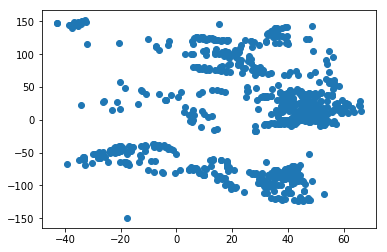

In [102]:
import matplotlib.pyplot as plt
list1, list2 = zip(*result)
plt.scatter(list1, list2)
plt.show()

In [62]:
%%sql
SELECT data FROM cards WHERE data @> '{"artist":"Rob Alexander"}' LIMIT 5

5 rows affected.


data
"{'id': '4a7bf234af44e07d9a159d4d89e96ce320919917', 'cmc': 6, 'name': 'Beacon of Immortality', 'text': ""Double target player's life total. Shuffle Beacon of Immortality into its owner's library."", 'type': 'Instant', 'types': ['Instant'], 'artist': 'Rob Alexander', 'colors': ['White'], 'flavor': 'The cave floods with light. A thousand rays shine forth and meld into one.', 'layout': 'normal', 'number': '10', 'rarity': 'Rare', 'manaCost': '{5}{W}', 'imageName': 'beacon of immortality', 'mciNumber': '10', 'multiverseid': 130553, 'colorIdentity': ['W']}"
"{'id': '9cea331c080c3bbc7987c6560f65e39e9d1ed34f', 'cmc': 5, 'name': 'Kavu Climber', 'text': 'When Kavu Climber enters the battlefield, draw a card.', 'type': 'Creature — Kavu', 'power': '3', 'types': ['Creature'], 'artist': 'Rob Alexander', 'colors': ['Green'], 'flavor': '""There was a crack of branches, a rustle of leaves, then a tremendous roar. Our party had no chance as death descended from above.""\n—Taseen, elvish bard', 'layout': 'normal', 'number': '273', 'rarity': 'Common', 'manaCost': '{3}{G}{G}', 'subtypes': ['Kavu'], 'imageName': 'kavu climber', 'mciNumber': '273', 'toughness': '3', 'multiverseid': 129511, 'colorIdentity': ['G']}"
"{'id': '28cc7c79cca8939fd9661f7abfc6ca453715b75e', 'cmc': 0, 'name': 'Llanowar Wastes', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {B} or {G} to your mana pool. Llanowar Wastes deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '355', 'rarity': 'Rare', 'imageName': 'llanowar wastes', 'mciNumber': '355', 'multiverseid': 129627, 'colorIdentity': ['B', 'G']}"
"{'id': '7a90b7ba6197f8774ed99ecf75ac9abb3e0c0f20', 'cmc': 0, 'name': 'Shivan Reef', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {U} or {R} to your mana pool. Shivan Reef deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '357', 'rarity': 'Rare', 'imageName': 'shivan reef', 'mciNumber': '357', 'multiverseid': 129731, 'colorIdentity': ['U', 'R']}"
"{'id': '8d1035f151615c949d0645b70fe01d8ab4a3f796', 'cmc': 0, 'name': 'Sulfurous Springs', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {B} or {R} to your mana pool. Sulfurous Springs deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '359', 'rarity': 'Rare', 'imageName': 'sulfurous springs', 'mciNumber': '359', 'multiverseid': 129751, 'colorIdentity': ['B', 'R']}"


In [71]:
%%sql
SELECT data FROM cards WHERE data @> '{"subtypes":["Human"]}' LIMIT 5

5 rows affected.


data
"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"
"{'id': 'd3488c0a916bd922856473155a8b49ec23fc2217', 'cmc': 4, 'name': 'Ballista Squad', 'text': '{X}{W}, {T}: Ballista Squad deals X damage to target attacking or blocking creature.', 'type': 'Creature — Human Rebel', 'power': '2', 'types': ['Creature'], 'artist': 'Matthew D. Wilson', 'colors': ['White'], 'flavor': 'The perfect antidote for a tightly packed formation.', 'layout': 'normal', 'number': '8', 'rarity': 'Uncommon', 'manaCost': '{3}{W}', 'subtypes': ['Human', 'Rebel'], 'imageName': 'ballista squad', 'mciNumber': '8', 'toughness': '2', 'multiverseid': 129477, 'colorIdentity': ['W']}"
"{'id': '29c46fca29e5de01dba3bbf05393325bc9132735', 'cmc': 3, 'name': 'Benalish Knight', 'text': 'Flash (You may cast this spell any time you could cast an instant.)\nFirst strike (This creature deals combat damage before creatures without first strike.)', 'type': 'Creature — Human Knight', 'power': '2', 'types': ['Creature'], 'artist': 'Zoltan Boros & Gabor Szikszai', 'colors': ['White'], 'flavor': '""We called them \'armored lightning.\'""\n—Gerrard of the Weatherlight', 'layout': 'normal', 'number': '11', 'rarity': 'Common', 'manaCost': '{2}{W}', 'subtypes': ['Human', 'Knight'], 'imageName': 'benalish knight', 'mciNumber': '11', 'toughness': '2', 'multiverseid': 136279, 'colorIdentity': ['W']}"
"{'id': 'e8b8dea65daf4e9070cce5de62bdbea0bf36d47c', 'cmc': 4, 'name': 'Cho-Manno, Revolutionary', 'text': 'Prevent all damage that would be dealt to Cho-Manno, Revolutionary.', 'type': 'Legendary Creature — Human Rebel', 'power': '2', 'types': ['Creature'], 'artist': 'Steven Belledin', 'colors': ['White'], 'flavor': '""Mercadia\'s masks can no longer hide the truth. Our day has come at last.""', 'layout': 'normal', 'number': '12', 'rarity': 'Rare', 'manaCost': '{2}{W}{W}', 'subtypes': ['Human', 'Rebel'], 'imageName': 'cho-manno, revolutionary', 'mciNumber': '12', 'toughness': '2', 'supertypes': ['Legendary'], 'multiverseid': 130554, 'colorIdentity': ['W']}"
"{'id': '80a6b907fc380ed97615e8abc0fe6071c4ceef67', 'cmc': 3, 'name': 'Field Marshal', 'text': 'Other Soldier creatures get +1/+1 and have first strike. (They deal combat damage before creatures without first strike.)', 'type': 'Creature — Human Soldier', 'power': '2', 'types': ['Creature'], 'artist': 'Stephen Tappin', 'colors': ['White'], 'flavor': 'He is the only one who sees the patterns in the overlapping maps and conflicting reports.', 'layout': 'normal', 'number': '15', 'rarity': 'Rare', 'manaCost': '{1}{W}{W}', 'subtypes': ['Human', 'Soldier'], 'imageName': 'field marshal', 'mciNumber': '15', 'toughness': '2', 'multiverseid': 135258, 'colorIdentity': ['W']}"


In [60]:
%%sql 
SELECT data FROM cards LIMIT 1

1 rows affected.


data
"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"


In [80]:
%%sql
DROP VIEW cardcolors;
CREATE VIEW cardcolors as
SELECT data->>'colors' as color FROM cards

Done.
Done.


[]

In [91]:
%sql SELECT * from cardcolors LIMIT 10

10 rows affected.


color
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"


In [106]:
%sql SELECT * FROM cardcolors LIMIT 5

(psycopg2.ProgrammingError) syntax error at or near "FROM"
LINE 1: SELECT *#> FROM cardcolors LIMIT 5
                   ^
 [SQL: 'SELECT *#> FROM cardcolors LIMIT 5']


In [117]:
%%sql
DROP VIEW cardcount;
CREATE VIEW cardcount as
SELECT color, count(*) FROM cardcolors GROUP BY color ORDER BY count DESC

Done.
Done.


[]

In [118]:
results = %sql SELECT * FROM cardcount

32 rows affected.


<Container object of 32 artists>

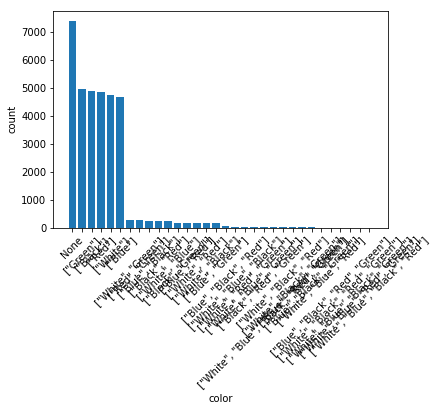

In [119]:
results.bar()

In [111]:
%sql SELECT * FROM cardcolors LIMIT 10

10 rows affected.


color
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"
"[""White""]"


In [114]:
%sql SELECT * from json_each(cardcolors.color)

(psycopg2.ProgrammingError) missing FROM-clause entry for table "cardcolors"
LINE 1: SELECT * from json_each(cardcolors.color)
                                ^
 [SQL: 'SELECT * from json_each(cardcolors.color)']
